In [2]:
import btrdb
from btrdb.utils.timez import *

from scipy import signal
import pandas as pd
import numpy as np

import matplotlib.colors as colors
from matplotlib import pyplot as plt

import utils

db = btrdb.connect()

In [3]:
epfl_streams = db.streams_in_collection('POW/EPFL', tags={'unit': 'amps'})
stream = epfl_streams[0]

In [4]:
start, _ = stream.earliest()
values = stream.values(start.time, start.time + ns_delta(seconds=2))
df = utils.points_to_dataframe(values, resolution='full', convert_time_to='relative')

# Plot time series

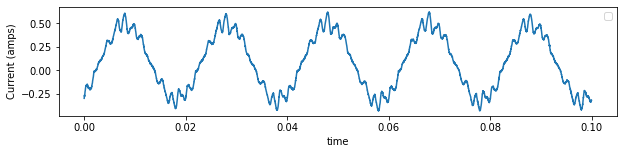

In [10]:
df.loc[:.1].plot(figsize=(10,2))
plt.ylabel('Current (amps)')
plt.legend('')

# Plot spectrogram

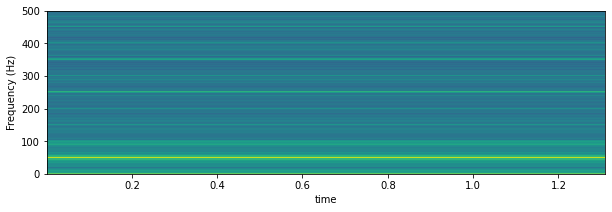

In [12]:
dt = df.index[1]-df.index[0]

fig, ax = plt.subplots(figsize=(10,3))
im = ax.specgram(np.array(df['value']), 
                Fs=1/dt, # sample rate
                NFFT=2**16, 
                scale='dB')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time')
ax.set_ylim(0,500)
plt.show()

# Plot power spectrum

In [14]:
f, psd = signal.periodogram(df['value'], fs=1/dt, nfft=2**16)

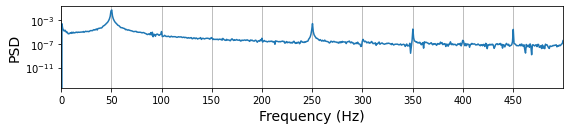

In [19]:
fig, ax = plt.subplots(figsize=(9,1.5))
ax.plot(f, np.abs(psd))
ax.set_xlim(0, 500)
ax.set_yscale('log')

# 
ax.set_xticks(np.arange(0,500,50), fonterize=12)
ax.grid(axis='x')

ax.set_ylabel(r'PSD', fontsize=14)# ($\frac{A^2}{Hz}$)', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
plt.show()

# Reconstruct signal from frequency components